In [3]:
#Diane Stratton
#Hood College - CS 522 Fall 2018
#Semester Project
#Notebook 3 - Association Analysis of Final Dataset

#import required libraries
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import rgb2hex, Normalize
from matplotlib.patches import Polygon
from matplotlib.colorbar import ColorbarBase

%matplotlib inline
plt.style.use('ggplot')

In [4]:
#import dataset, and verify contents
df = pd.read_csv('proj_data_final_v1.csv');
print(df.shape)
df.head()

(51, 87)


,state,alc_bng_vh,alc_bng_h,alc_bng_av,alc_bng_ml,alc_bng_l,alc_hv_h,alc_hv_mh,alc_hv_a,alc_hv_ml,...,pov_l,fluvax_h,fluvax_mh,fluvax_ml,fluvax_l,fm_h,fm_mh,fm_ml,fm_l,fm_vl
0,Alaska,0,0,1,0,0,0,0,1,0,...,1,0,0,0,1,0,1,0,0,0
1,Alabama,0,0,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2,Arkansas,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
3,Arizona,0,0,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
4,California,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0


In [5]:
#remove the first column (state) prior to analysis
df.drop(df.columns[[0, 0]], axis=1, inplace=True)
df.head()

,alc_bng_vh,alc_bng_h,alc_bng_av,alc_bng_ml,alc_bng_l,alc_hv_h,alc_hv_mh,alc_hv_a,alc_hv_ml,alc_hv_l,...,pov_l,fluvax_h,fluvax_mh,fluvax_ml,fluvax_l,fm_h,fm_mh,fm_ml,fm_l,fm_vl
0,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,1,0,0,0
1,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
3,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
4,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [6]:
#use mlxtend apriori function to find frequent itemsets
#set minimum support to 15 percent support
freq_itemsets = apriori(df, min_support=0.15, use_colnames=True)
freq_itemsets.head()

,support,itemsets
0,0.294118,(alc_bng_h)
1,0.235294,(alc_bng_av)
2,0.235294,(alc_bng_ml)
3,0.196078,(alc_hv_mh)
4,0.392157,(alc_hv_a)


In [7]:
freq_itemsets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 2 columns):
support     404 non-null float64
itemsets    404 non-null object
dtypes: float64(1), object(1)
memory usage: 6.4+ KB


In [8]:
#generate association rules from frequent itemsets
#use confidence (vs lift)
#set minimum confidence level to 60 percent
rules = association_rules(freq_itemsets, metric="confidence", min_threshold=0.6)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(alc_bng_h),(arth_m),0.294118,0.627451,0.176471,0.600000,0.956250,-0.008074,0.931373
1,(alc_bng_h),(copd_ml),0.294118,0.529412,0.176471,0.600000,1.133333,0.020761,1.176471
2,(alc_bng_h),(hsdipl_av),0.294118,0.647059,0.235294,0.800000,1.236364,0.044983,1.764706
3,(alc_bng_av),(alc_hv_a),0.235294,0.392157,0.156863,0.666667,1.700000,0.064591,1.823529
4,(alc_bng_av),(arth_m),0.235294,0.627451,0.176471,0.750000,1.195313,0.028835,1.490196


In [9]:
rules.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472 entries, 0 to 471
Data columns (total 9 columns):
antecedents           472 non-null object
consequents           472 non-null object
antecedent support    472 non-null float64
consequent support    472 non-null float64
support               472 non-null float64
confidence            472 non-null float64
lift                  472 non-null float64
leverage              472 non-null float64
conviction            472 non-null float64
dtypes: float64(7), object(2)
memory usage: 33.3+ KB


In [10]:
#create two copies of rules DataFrame
#for mining antecedents and consequents for 'fm' rules
rules_fm_antec = rules
rules_fm_conseq = rules

In [11]:
#mine antecedents for rules containing 'fm' attributes
rules_fm_antec['antecedents'] = rules_fm_antec['antecedents'].astype('str')
rules_fm_antec[rules_fm_antec['antecedents'].str.contains('fm_')]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
42,frozenset({'fm_mh'}),(arth_m),0.215686,0.627451,0.176471,0.818182,1.303977,0.041138,2.049020
43,frozenset({'fm_ml'}),(arth_m),0.254902,0.627451,0.156863,0.615385,0.980769,-0.003076,0.968627
47,frozenset({'fm_l'}),(asth_ml),0.313725,0.411765,0.196078,0.625000,1.517857,0.066897,1.568627
68,frozenset({'fm_l'}),(scr_mammo_mh),0.313725,0.411765,0.215686,0.687500,1.669643,0.086505,1.882353
107,frozenset({'fm_ml'}),(ovrwt_mh),0.254902,0.470588,0.156863,0.615385,1.307692,0.036909,1.376471
115,frozenset({'fm_mh'}),(hsdipl_av),0.215686,0.647059,0.176471,0.818182,1.264463,0.036909,1.941176
116,frozenset({'fm_ml'}),(hsdipl_av),0.254902,0.647059,0.176471,0.692308,1.069930,0.011534,1.147059
117,frozenset({'fm_l'}),(hsdipl_av),0.313725,0.647059,0.215686,0.687500,1.062500,0.012687,1.129412
119,frozenset({'fm_ml'}),(insur_av),0.254902,0.431373,0.156863,0.615385,1.426573,0.046905,1.478431
312,"frozenset({'hsdipl_av', 'fm_l'})",(scr_mammo_mh),0.215686,0.411765,0.156863,0.727273,1.766234,0.068051,2.156863


In [12]:
#mine consequents for rules containing 'fm' attributes
rules_fm_conseq['consequents'] = rules_fm_conseq['consequents'].astype('str')
rules_fm_conseq[rules_fm_conseq['consequents'].str.contains('fm_')]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


In [13]:
#reimport dataset to eval the 'fm' rules
df_eval = pd.read_csv('proj_data_final_v1.csv');
df_eval.head()

,state,alc_bng_vh,alc_bng_h,alc_bng_av,alc_bng_ml,alc_bng_l,alc_hv_h,alc_hv_mh,alc_hv_a,alc_hv_ml,...,pov_l,fluvax_h,fluvax_mh,fluvax_ml,fluvax_l,fm_h,fm_mh,fm_ml,fm_l,fm_vl
0,Alaska,0,0,1,0,0,0,0,1,0,...,1,0,0,0,1,0,1,0,0,0
1,Alabama,0,0,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2,Arkansas,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
3,Arizona,0,0,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
4,California,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0


In [14]:
#view the states meeting rule 42: fm_mh and arth_m
rule_42 = df_eval.loc[(df_eval['fm_mh'] == 1) & (df_eval['arth_m'] == 1), ['state', 'fm_mh', 'arth_m']]
rule_42

,state,fm_mh,arth_m
0,Alaska,1,1
8,Delaware,1,1
11,Hawaii,1,1
12,Iowa,1,1
19,Massachusetts,1,1
29,Nebraska,1,1
39,Rhode Island,1,1
41,South Dakota,1,1
48,Wisconsin,1,1


In [15]:
#view the states meeting rule 43: fm_ml and arth_m
rule_43 = df_eval.loc[(df_eval['fm_ml'] == 1) & (df_eval['arth_m'] == 1), ['state', 'fm_ml', 'arth_m']]
rule_43

,state,fm_ml,arth_m
13,Idaho,1,1
16,Kansas,1,1
20,Maryland,1,1
23,Minnesota,1,1
28,North Dakota,1,1
34,New York,1,1
37,Oregon,1,1
45,Virginia,1,1


In [16]:
#view the states meeting rule 47: fm_l and asth_ml
rule_47 = df_eval.loc[(df_eval['fm_l'] == 1) & (df_eval['asth_ml'] == 1), ['state', 'fm_l', 'asth_ml']]
rule_47

,state,fm_l,asth_ml
4,California,1,1
5,Colorado,1,1
10,Georgia,1,1
14,Illinois,1,1
18,Louisiana,1,1
25,Mississippi,1,1
27,North Carolina,1,1
31,New Jersey,1,1
40,South Carolina,1,1
44,Utah,1,1


In [17]:
#view the states meeting rule 68: fm_l and scr_mammo_mh
rule_68 = df_eval.loc[(df_eval['fm_l'] == 1) & (df_eval['scr_mammo_mh'] == 1), ['state', 'fm_l', 'scr_mammo_mh']]
rule_68

,state,fm_l,scr_mammo_mh
1,Alabama,1,1
10,Georgia,1,1
14,Illinois,1,1
18,Louisiana,1,1
27,North Carolina,1,1
35,Ohio,1,1
38,Pennsylvania,1,1
40,South Carolina,1,1
42,Tennessee,1,1
44,Utah,1,1


In [18]:
#view the states meeting rule 107: fm_ml and ovrwt_mh
rule_107 = df_eval.loc[(df_eval['fm_ml'] == 1) & (df_eval['ovrwt_mh'] == 1), ['state', 'fm_ml', 'ovrwt_mh']]
rule_107

,state,fm_ml,ovrwt_mh
2,Arkansas,1,1
15,Indiana,1,1
16,Kansas,1,1
17,Kentucky,1,1
22,Michigan,1,1
28,North Dakota,1,1
32,New Mexico,1,1
45,Virginia,1,1


In [19]:
#view the states meeting rule 115: fm_mh and hsdipl_av
rule_115 = df_eval.loc[(df_eval['fm_mh'] == 1) & (df_eval['hsdipl_av'] == 1), ['state', 'fm_mh', 'hsdipl_av']]
rule_115

,state,fm_mh,hsdipl_av
0,Alaska,1,1
12,Iowa,1,1
19,Massachusetts,1,1
24,Missouri,1,1
29,Nebraska,1,1
39,Rhode Island,1,1
41,South Dakota,1,1
48,Wisconsin,1,1
49,West Virginia,1,1


In [20]:
#view the states meeting rule 116: fm_ml and hsdipl_av
rule_116 = df_eval.loc[(df_eval['fm_ml'] == 1) & (df_eval['hsdipl_av'] == 1), ['state', 'fm_ml', 'hsdipl_av']]
rule_116

,state,fm_ml,hsdipl_av
13,Idaho,1,1
16,Kansas,1,1
17,Kentucky,1,1
20,Maryland,1,1
22,Michigan,1,1
23,Minnesota,1,1
34,New York,1,1
37,Oregon,1,1
45,Virginia,1,1


In [21]:
#view the states meeting rule 117: fm_l and hsdipl_av
rule_117 = df_eval.loc[(df_eval['fm_l'] == 1) & (df_eval['hsdipl_av'] == 1), ['state', 'fm_l', 'hsdipl_av']]
rule_117

,state,fm_l,hsdipl_av
1,Alabama,1,1
4,California,1,1
5,Colorado,1,1
14,Illinois,1,1
27,North Carolina,1,1
31,New Jersey,1,1
35,Ohio,1,1
38,Pennsylvania,1,1
40,South Carolina,1,1
42,Tennessee,1,1


In [22]:
#view the states meeting rule 119: fm_ml and insur_av
rule_119 = df_eval.loc[(df_eval['fm_ml'] == 1) & (df_eval['insur_av'] == 1), ['state', 'fm_ml', 'insur_av']]
rule_119

,state,fm_ml,insur_av
2,Arkansas,1,1
15,Indiana,1,1
20,Maryland,1,1
22,Michigan,1,1
32,New Mexico,1,1
34,New York,1,1
37,Oregon,1,1
45,Virginia,1,1


In [23]:
#view the states meeting rule 312: fm_l and scr_mammo_mh, and hsdipl_av
rule_312 = df_eval.loc[(df_eval['fm_l'] == 1) & (df_eval['scr_mammo_mh'] == 1) & (df_eval['hsdipl_av'] == 1), 
                      ['state', 'fm_l', 'scr_mammo_mh', 'hsdipl_av']]
rule_312

,state,fm_l,scr_mammo_mh,hsdipl_av
1,Alabama,1,1,1
14,Illinois,1,1,1
27,North Carolina,1,1,1
35,Ohio,1,1,1
38,Pennsylvania,1,1,1
40,South Carolina,1,1,1
42,Tennessee,1,1,1
44,Utah,1,1,1


In [24]:
#view the states meeting rule 313: fm_l and hsdipl_av, and scr_mammo_mh
rule_313 = df_eval.loc[(df_eval['fm_l'] == 1) & (df_eval['hsdipl_av'] == 1) & (df_eval['scr_mammo_mh'] == 1), 
                       ['state', 'fm_l', 'hsdipl_av', 'scr_mammo_mh']]
rule_313

,state,fm_l,hsdipl_av,scr_mammo_mh
1,Alabama,1,1,1
14,Illinois,1,1,1
27,North Carolina,1,1,1
35,Ohio,1,1,1
38,Pennsylvania,1,1,1
40,South Carolina,1,1,1
42,Tennessee,1,1,1
44,Utah,1,1,1


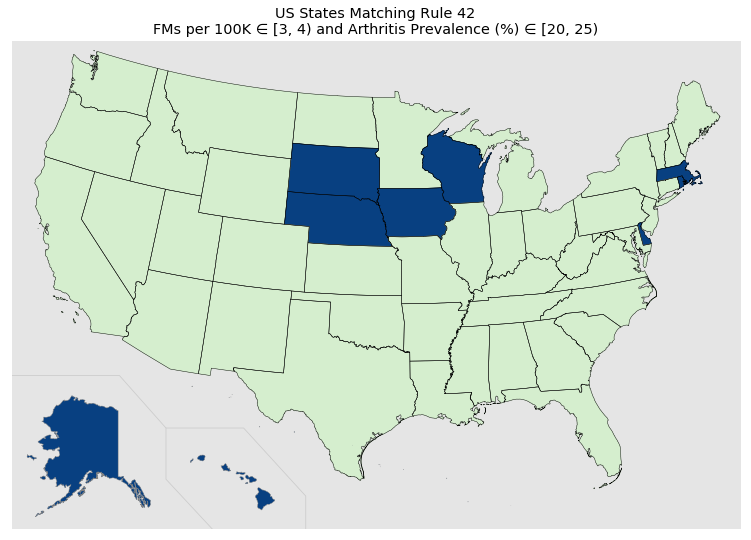

In [25]:
#generate map for rule_42

#Code is a modification of the code provided on the matplotlib GitHub account
#URL https://github.com/matplotlib/basemap/blob/master/examples/fillstates.py


plt.rcParams['figure.figsize'] = (15,9)

fig, ax = plt.subplots()

# Lambert Conformal map of lower 48 states.
m = Basemap(llcrnrlon=-119,llcrnrlat=20,urcrnrlon=-64,urcrnrlat=49,
            projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

# Mercator projection, for Alaska and Hawaii
m_ = Basemap(llcrnrlon=-190,llcrnrlat=20,urcrnrlon=-143,urcrnrlat=46,
projection='merc',lat_ts=20) # do not change these numbers

#%% ---------   draw state boundaries  ------------------------------------
## data from U.S Census Bureau
## http://www.census.gov/geo/www/cob/st2000.html
shp_info = m.readshapefile('st99_d00','states',drawbounds=True,
                           linewidth=0.45,color='black')
shp_info_ = m_.readshapefile('st99_d00','states',drawbounds=False)

#%% ---------   convert rule set to dictionary  --------------------------
## only need single column for map generation
rule_42_d = rule_42.set_index('state')['fm_mh'].to_dict()

#%% -------- choose a color for matching states. -------
colors={}
statenames=[]
cmap = plt.cm.GnBu #use 'GnBu' colormap
vmin = 0; vmax = 450 # set range.
norm = Normalize(vmin=vmin, vmax=vmax)
for shapedict in m.states_info:
    statename = shapedict['NAME']
    if statename not in ['Puerto Rico']:
        if statename in rule_42_d:
            colors[statename] = cmap(vmax/4)
        else:
            colors[statename] = cmap(vmin + 50)
    statenames.append(statename)

#%% ---------  cycle through state names, color each one.  --------------------
for nshape,seg in enumerate(m.states):
    # skip Puerto Rico.
    if statenames[nshape] not in ['Puerto Rico']:
        color = rgb2hex(colors[statenames[nshape]])
        poly = Polygon(seg,facecolor=color,edgecolor=color)
        ax.add_patch(poly)

#%% ---------  Define offsets.  --------------------
AREA_1 = 0.005  # exclude small Hawaiian islands that are smaller than AREA_1
AREA_2 = AREA_1 * 30.0  # exclude Alaskan islands that are smaller than AREA_2
AK_SCALE = 0.19  # scale down Alaska to show as a map inset
HI_OFFSET_X = -1900000  # X coordinate offset amount to move Hawaii "beneath" Texas
HI_OFFSET_Y = 250000    # similar to above: Y offset for Hawaii
AK_OFFSET_X = -250000   # X offset for Alaska (These four values are obtained
AK_OFFSET_Y = -750000 # via manual trial and error, thus changing them is not recommended.)


for nshape, shapedict in enumerate(m_.states_info):  # plot Alaska and Hawaii as map insets
    if shapedict['NAME'] in ['Alaska', 'Hawaii']:
        seg = m_.states[int(shapedict['SHAPENUM'] - 1)]
        if shapedict['NAME'] == 'Hawaii' and float(shapedict['AREA']) > AREA_1:
            seg = [(x + HI_OFFSET_X, y + HI_OFFSET_Y) for x, y in seg]
            color = rgb2hex(colors[statenames[nshape]])
        elif shapedict['NAME'] == 'Alaska' and float(shapedict['AREA']) > AREA_2:
            seg = [(x*AK_SCALE + AK_OFFSET_X, y*AK_SCALE + AK_OFFSET_Y)\
                   for x, y in seg]
            color = rgb2hex(colors[statenames[nshape]])
        poly = Polygon(seg, facecolor=color, edgecolor='gray', linewidth=.45)
        ax.add_patch(poly)

main = 'US States Matching Rule 42'
sub = '\nFMs per 100K ∈ [3, 4) and Arthritis Prevalence (%) ∈ [20, 25)'
plt.title(main+sub)


#%% ---------  Plot bounding boxes for Alaska and Hawaii insets  --------------
light_gray = [0.8]*3  # define light gray color RGB
x1,y1 = m_([-190,-183,-180,-180,-175,-171,-171],[29,29,26,26,26,22,20])
x2,y2 = m_([-180,-180,-177],[26,23,20])  # these numbers are fine-tuned manually
m_.plot(x1,y1,color=light_gray,linewidth=0.8)  # do not change them drastically
m_.plot(x2,y2,color=light_gray,linewidth=0.8)

plt.show()

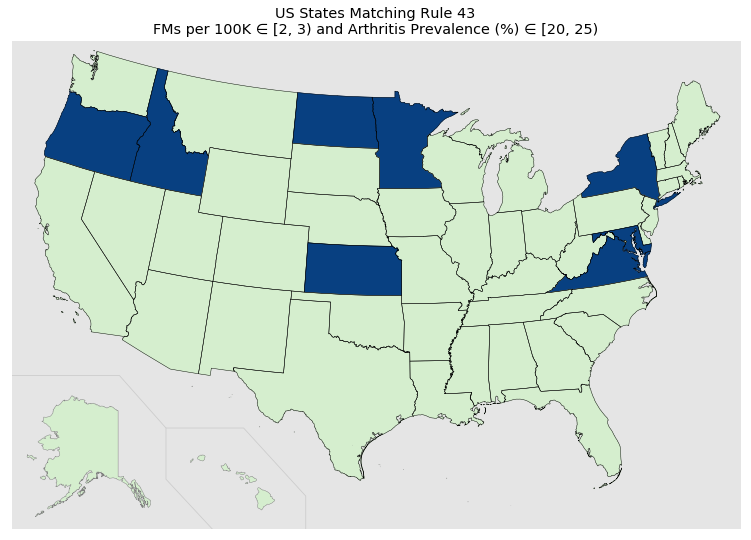

In [26]:
#generate map for rule_43
plt.rcParams['figure.figsize'] = (15,9)

fig, ax = plt.subplots()

# Lambert Conformal map of lower 48 states.
m = Basemap(llcrnrlon=-119,llcrnrlat=20,urcrnrlon=-64,urcrnrlat=49,
            projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

# Mercator projection, for Alaska and Hawaii
m_ = Basemap(llcrnrlon=-190,llcrnrlat=20,urcrnrlon=-143,urcrnrlat=46,
projection='merc',lat_ts=20) # do not change these numbers

#%% ---------   draw state boundaries  ------------------------------------
## data from U.S Census Bureau
## http://www.census.gov/geo/www/cob/st2000.html
shp_info = m.readshapefile('st99_d00','states',drawbounds=True,
                           linewidth=0.45,color='black')
shp_info_ = m_.readshapefile('st99_d00','states',drawbounds=False)

#%% ---------   convert rule set to dictionary  --------------------------
## only need single column for map generation
rule_43_d = rule_43.set_index('state')['fm_ml'].to_dict()

#%% -------- choose a color for matching states. -------
colors={}
statenames=[]
cmap = plt.cm.GnBu #use 'GnBu' colormap
vmin = 0; vmax = 450 # set range.
norm = Normalize(vmin=vmin, vmax=vmax)
for shapedict in m.states_info:
    statename = shapedict['NAME']
    if statename not in ['Puerto Rico']:
        if statename in rule_43_d:
            colors[statename] = cmap(vmax/4)
        else:
            colors[statename] = cmap(vmin + 50)
    statenames.append(statename)

#%% ---------  cycle through state names, color each one.  --------------------
for nshape,seg in enumerate(m.states):
    # skip Puerto Rico.
    if statenames[nshape] not in ['Puerto Rico']:
        color = rgb2hex(colors[statenames[nshape]])
        poly = Polygon(seg,facecolor=color,edgecolor=color)
        ax.add_patch(poly)

#%% ---------  Define offsets.  --------------------
AREA_1 = 0.005  # exclude small Hawaiian islands that are smaller than AREA_1
AREA_2 = AREA_1 * 30.0  # exclude Alaskan islands that are smaller than AREA_2
AK_SCALE = 0.19  # scale down Alaska to show as a map inset
HI_OFFSET_X = -1900000  # X coordinate offset amount to move Hawaii "beneath" Texas
HI_OFFSET_Y = 250000    # similar to above: Y offset for Hawaii
AK_OFFSET_X = -250000   # X offset for Alaska (These four values are obtained
AK_OFFSET_Y = -750000 # via manual trial and error, thus changing them is not recommended.)


for nshape, shapedict in enumerate(m_.states_info):  # plot Alaska and Hawaii as map insets
    if shapedict['NAME'] in ['Alaska', 'Hawaii']:
        seg = m_.states[int(shapedict['SHAPENUM'] - 1)]
        if shapedict['NAME'] == 'Hawaii' and float(shapedict['AREA']) > AREA_1:
            seg = [(x + HI_OFFSET_X, y + HI_OFFSET_Y) for x, y in seg]
            color = rgb2hex(colors[statenames[nshape]])
        elif shapedict['NAME'] == 'Alaska' and float(shapedict['AREA']) > AREA_2:
            seg = [(x*AK_SCALE + AK_OFFSET_X, y*AK_SCALE + AK_OFFSET_Y)\
                   for x, y in seg]
            color = rgb2hex(colors[statenames[nshape]])
        poly = Polygon(seg, facecolor=color, edgecolor='gray', linewidth=.45)
        ax.add_patch(poly)

main = 'US States Matching Rule 43'
sub = '\nFMs per 100K ∈ [2, 3) and Arthritis Prevalence (%) ∈ [20, 25)'
plt.title(main+sub)


#%% ---------  Plot bounding boxes for Alaska and Hawaii insets  --------------
light_gray = [0.8]*3  # define light gray color RGB
x1,y1 = m_([-190,-183,-180,-180,-175,-171,-171],[29,29,26,26,26,22,20])
x2,y2 = m_([-180,-180,-177],[26,23,20])  # these numbers are fine-tuned manually
m_.plot(x1,y1,color=light_gray,linewidth=0.8)  # do not change them drastically
m_.plot(x2,y2,color=light_gray,linewidth=0.8)

plt.show()

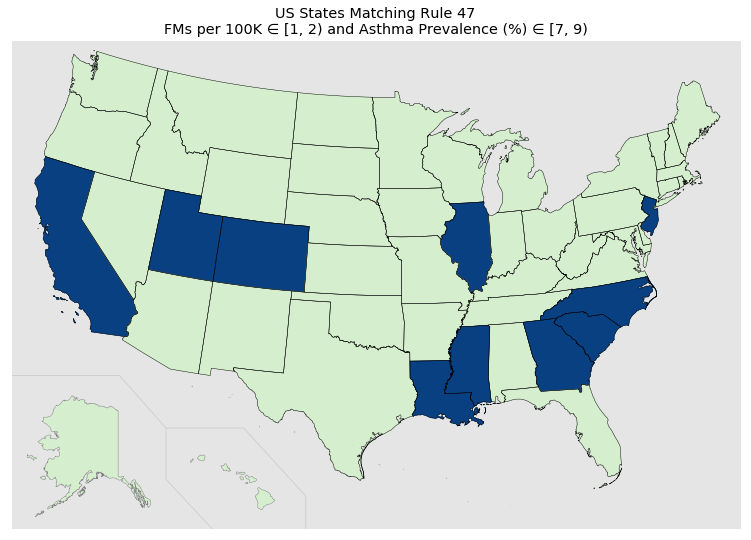

In [27]:
#generate map for rule_47
plt.rcParams['figure.figsize'] = (15,9)

fig, ax = plt.subplots()

# Lambert Conformal map of lower 48 states.
m = Basemap(llcrnrlon=-119,llcrnrlat=20,urcrnrlon=-64,urcrnrlat=49,
            projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

# Mercator projection, for Alaska and Hawaii
m_ = Basemap(llcrnrlon=-190,llcrnrlat=20,urcrnrlon=-143,urcrnrlat=46,
projection='merc',lat_ts=20) # do not change these numbers

#%% ---------   draw state boundaries  ------------------------------------
## data from U.S Census Bureau
## http://www.census.gov/geo/www/cob/st2000.html
shp_info = m.readshapefile('st99_d00','states',drawbounds=True,
                           linewidth=0.45,color='black')
shp_info_ = m_.readshapefile('st99_d00','states',drawbounds=False)

#%% ---------   convert rule set to dictionary  --------------------------
## only need single column for map generation
rule_47_d = rule_47.set_index('state')['fm_l'].to_dict()

#%% -------- choose a color for matching states. -------
colors={}
statenames=[]
cmap = plt.cm.GnBu #use 'GnBu' colormap
vmin = 0; vmax = 450 # set range.
norm = Normalize(vmin=vmin, vmax=vmax)
for shapedict in m.states_info:
    statename = shapedict['NAME']
    if statename not in ['Puerto Rico']:
        if statename in rule_47_d:
            colors[statename] = cmap(vmax/4)
        else:
            colors[statename] = cmap(vmin + 50)
    statenames.append(statename)

#%% ---------  cycle through state names, color each one.  --------------------
for nshape,seg in enumerate(m.states):
    # skip Puerto Rico.
    if statenames[nshape] not in ['Puerto Rico']:
        color = rgb2hex(colors[statenames[nshape]])
        poly = Polygon(seg,facecolor=color,edgecolor=color)
        ax.add_patch(poly)

#%% ---------  Define offsets.  --------------------
AREA_1 = 0.005  # exclude small Hawaiian islands that are smaller than AREA_1
AREA_2 = AREA_1 * 30.0  # exclude Alaskan islands that are smaller than AREA_2
AK_SCALE = 0.19  # scale down Alaska to show as a map inset
HI_OFFSET_X = -1900000  # X coordinate offset amount to move Hawaii "beneath" Texas
HI_OFFSET_Y = 250000    # similar to above: Y offset for Hawaii
AK_OFFSET_X = -250000   # X offset for Alaska (These four values are obtained
AK_OFFSET_Y = -750000 # via manual trial and error, thus changing them is not recommended.)


for nshape, shapedict in enumerate(m_.states_info):  # plot Alaska and Hawaii as map insets
    if shapedict['NAME'] in ['Alaska', 'Hawaii']:
        seg = m_.states[int(shapedict['SHAPENUM'] - 1)]
        if shapedict['NAME'] == 'Hawaii' and float(shapedict['AREA']) > AREA_1:
            seg = [(x + HI_OFFSET_X, y + HI_OFFSET_Y) for x, y in seg]
            color = rgb2hex(colors[statenames[nshape]])
        elif shapedict['NAME'] == 'Alaska' and float(shapedict['AREA']) > AREA_2:
            seg = [(x*AK_SCALE + AK_OFFSET_X, y*AK_SCALE + AK_OFFSET_Y)\
                   for x, y in seg]
            color = rgb2hex(colors[statenames[nshape]])
        poly = Polygon(seg, facecolor=color, edgecolor='gray', linewidth=.45)
        ax.add_patch(poly)

main = 'US States Matching Rule 47'
sub = '\nFMs per 100K ∈ [1, 2) and Asthma Prevalence (%) ∈ [7, 9)'
plt.title(main+sub)


#%% ---------  Plot bounding boxes for Alaska and Hawaii insets  --------------
light_gray = [0.8]*3  # define light gray color RGB
x1,y1 = m_([-190,-183,-180,-180,-175,-171,-171],[29,29,26,26,26,22,20])
x2,y2 = m_([-180,-180,-177],[26,23,20])  # these numbers are fine-tuned manually
m_.plot(x1,y1,color=light_gray,linewidth=0.8)  # do not change them drastically
m_.plot(x2,y2,color=light_gray,linewidth=0.8)

plt.show()

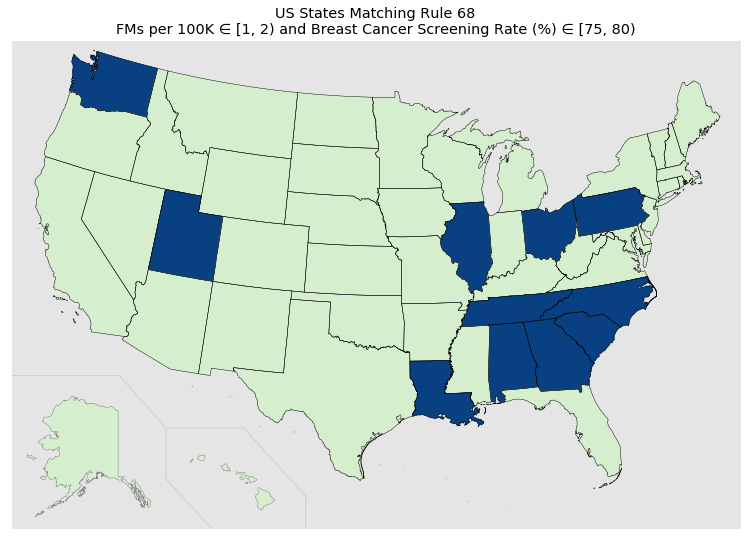

In [28]:
#generate map for rule_68
plt.rcParams['figure.figsize'] = (15,9)

fig, ax = plt.subplots()

# Lambert Conformal map of lower 48 states.
m = Basemap(llcrnrlon=-119,llcrnrlat=20,urcrnrlon=-64,urcrnrlat=49,
            projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

# Mercator projection, for Alaska and Hawaii
m_ = Basemap(llcrnrlon=-190,llcrnrlat=20,urcrnrlon=-143,urcrnrlat=46,
projection='merc',lat_ts=20) # do not change these numbers

#%% ---------   draw state boundaries  ------------------------------------
## data from U.S Census Bureau
## http://www.census.gov/geo/www/cob/st2000.html
shp_info = m.readshapefile('st99_d00','states',drawbounds=True,
                           linewidth=0.45,color='black')
shp_info_ = m_.readshapefile('st99_d00','states',drawbounds=False)

#%% ---------   convert rule set to dictionary  --------------------------
## only need single column for map generation
rule_68_d = rule_68.set_index('state')['fm_l'].to_dict()

#%% -------- choose a color for matching states. -------
colors={}
statenames=[]
cmap = plt.cm.GnBu #use 'GnBu' colormap
vmin = 0; vmax = 450 # set range.
norm = Normalize(vmin=vmin, vmax=vmax)
for shapedict in m.states_info:
    statename = shapedict['NAME']
    if statename not in ['Puerto Rico']:
        if statename in rule_68_d:
            colors[statename] = cmap(vmax/4)
        else:
            colors[statename] = cmap(vmin + 50)
    statenames.append(statename)

#%% ---------  cycle through state names, color each one.  --------------------
for nshape,seg in enumerate(m.states):
    # skip Puerto Rico.
    if statenames[nshape] not in ['Puerto Rico']:
        color = rgb2hex(colors[statenames[nshape]])
        poly = Polygon(seg,facecolor=color,edgecolor=color)
        ax.add_patch(poly)

#%% ---------  Define offsets.  --------------------
AREA_1 = 0.005  # exclude small Hawaiian islands that are smaller than AREA_1
AREA_2 = AREA_1 * 30.0  # exclude Alaskan islands that are smaller than AREA_2
AK_SCALE = 0.19  # scale down Alaska to show as a map inset
HI_OFFSET_X = -1900000  # X coordinate offset amount to move Hawaii "beneath" Texas
HI_OFFSET_Y = 250000    # similar to above: Y offset for Hawaii
AK_OFFSET_X = -250000   # X offset for Alaska (These four values are obtained
AK_OFFSET_Y = -750000 # via manual trial and error, thus changing them is not recommended.)


for nshape, shapedict in enumerate(m_.states_info):  # plot Alaska and Hawaii as map insets
    if shapedict['NAME'] in ['Alaska', 'Hawaii']:
        seg = m_.states[int(shapedict['SHAPENUM'] - 1)]
        if shapedict['NAME'] == 'Hawaii' and float(shapedict['AREA']) > AREA_1:
            seg = [(x + HI_OFFSET_X, y + HI_OFFSET_Y) for x, y in seg]
            color = rgb2hex(colors[statenames[nshape]])
        elif shapedict['NAME'] == 'Alaska' and float(shapedict['AREA']) > AREA_2:
            seg = [(x*AK_SCALE + AK_OFFSET_X, y*AK_SCALE + AK_OFFSET_Y)\
                   for x, y in seg]
            color = rgb2hex(colors[statenames[nshape]])
        poly = Polygon(seg, facecolor=color, edgecolor='gray', linewidth=.45)
        ax.add_patch(poly)

main = 'US States Matching Rule 68'
sub = '\nFMs per 100K ∈ [1, 2) and Breast Cancer Screening Rate (%) ∈ [75, 80)'
plt.title(main+sub)


#%% ---------  Plot bounding boxes for Alaska and Hawaii insets  --------------
light_gray = [0.8]*3  # define light gray color RGB
x1,y1 = m_([-190,-183,-180,-180,-175,-171,-171],[29,29,26,26,26,22,20])
x2,y2 = m_([-180,-180,-177],[26,23,20])  # these numbers are fine-tuned manually
m_.plot(x1,y1,color=light_gray,linewidth=0.8)  # do not change them drastically
m_.plot(x2,y2,color=light_gray,linewidth=0.8)

plt.show()

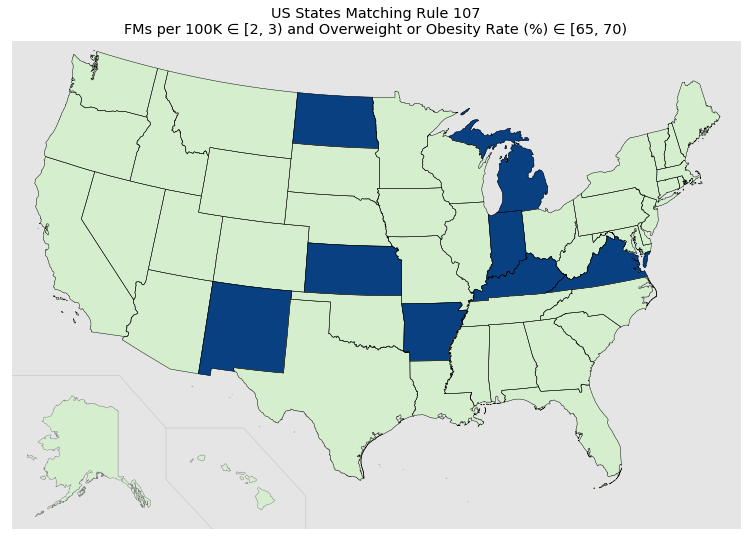

In [29]:
#generate map for rule_107
plt.rcParams['figure.figsize'] = (15,9)

fig, ax = plt.subplots()

# Lambert Conformal map of lower 48 states.
m = Basemap(llcrnrlon=-119,llcrnrlat=20,urcrnrlon=-64,urcrnrlat=49,
            projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

# Mercator projection, for Alaska and Hawaii
m_ = Basemap(llcrnrlon=-190,llcrnrlat=20,urcrnrlon=-143,urcrnrlat=46,
projection='merc',lat_ts=20) # do not change these numbers

#%% ---------   draw state boundaries  ------------------------------------
## data from U.S Census Bureau
## http://www.census.gov/geo/www/cob/st2000.html
shp_info = m.readshapefile('st99_d00','states',drawbounds=True,
                           linewidth=0.45,color='black')
shp_info_ = m_.readshapefile('st99_d00','states',drawbounds=False)

#%% ---------   convert rule set to dictionary  --------------------------
## only need single column for map generation
rule_107_d = rule_107.set_index('state')['fm_ml'].to_dict()

#%% -------- choose a color for matching states. -------
colors={}
statenames=[]
cmap = plt.cm.GnBu #use 'GnBu' colormap
vmin = 0; vmax = 450 # set range.
norm = Normalize(vmin=vmin, vmax=vmax)
for shapedict in m.states_info:
    statename = shapedict['NAME']
    if statename not in ['Puerto Rico']:
        if statename in rule_107_d:
            colors[statename] = cmap(vmax/4)
        else:
            colors[statename] = cmap(vmin + 50)
    statenames.append(statename)

#%% ---------  cycle through state names, color each one.  --------------------
for nshape,seg in enumerate(m.states):
    # skip Puerto Rico.
    if statenames[nshape] not in ['Puerto Rico']:
        color = rgb2hex(colors[statenames[nshape]])
        poly = Polygon(seg,facecolor=color,edgecolor=color)
        ax.add_patch(poly)

#%% ---------  Define offsets.  --------------------
AREA_1 = 0.005  # exclude small Hawaiian islands that are smaller than AREA_1
AREA_2 = AREA_1 * 30.0  # exclude Alaskan islands that are smaller than AREA_2
AK_SCALE = 0.19  # scale down Alaska to show as a map inset
HI_OFFSET_X = -1900000  # X coordinate offset amount to move Hawaii "beneath" Texas
HI_OFFSET_Y = 250000    # similar to above: Y offset for Hawaii
AK_OFFSET_X = -250000   # X offset for Alaska (These four values are obtained
AK_OFFSET_Y = -750000 # via manual trial and error, thus changing them is not recommended.)


for nshape, shapedict in enumerate(m_.states_info):  # plot Alaska and Hawaii as map insets
    if shapedict['NAME'] in ['Alaska', 'Hawaii']:
        seg = m_.states[int(shapedict['SHAPENUM'] - 1)]
        if shapedict['NAME'] == 'Hawaii' and float(shapedict['AREA']) > AREA_1:
            seg = [(x + HI_OFFSET_X, y + HI_OFFSET_Y) for x, y in seg]
            color = rgb2hex(colors[statenames[nshape]])
        elif shapedict['NAME'] == 'Alaska' and float(shapedict['AREA']) > AREA_2:
            seg = [(x*AK_SCALE + AK_OFFSET_X, y*AK_SCALE + AK_OFFSET_Y)\
                   for x, y in seg]
            color = rgb2hex(colors[statenames[nshape]])
        poly = Polygon(seg, facecolor=color, edgecolor='gray', linewidth=.45)
        ax.add_patch(poly)

main = 'US States Matching Rule 107'
sub = '\nFMs per 100K ∈ [2, 3) and Overweight or Obesity Rate (%) ∈ [65, 70)'
plt.title(main+sub)


#%% ---------  Plot bounding boxes for Alaska and Hawaii insets  --------------
light_gray = [0.8]*3  # define light gray color RGB
x1,y1 = m_([-190,-183,-180,-180,-175,-171,-171],[29,29,26,26,26,22,20])
x2,y2 = m_([-180,-180,-177],[26,23,20])  # these numbers are fine-tuned manually
m_.plot(x1,y1,color=light_gray,linewidth=0.8)  # do not change them drastically
m_.plot(x2,y2,color=light_gray,linewidth=0.8)

plt.show()

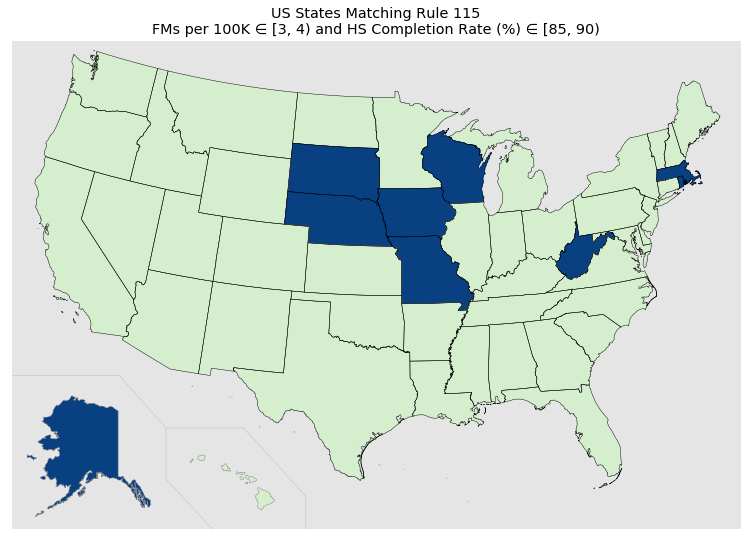

In [30]:
#generate map for rule_115
plt.rcParams['figure.figsize'] = (15,9)

fig, ax = plt.subplots()

# Lambert Conformal map of lower 48 states.
m = Basemap(llcrnrlon=-119,llcrnrlat=20,urcrnrlon=-64,urcrnrlat=49,
            projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

# Mercator projection, for Alaska and Hawaii
m_ = Basemap(llcrnrlon=-190,llcrnrlat=20,urcrnrlon=-143,urcrnrlat=46,
projection='merc',lat_ts=20) # do not change these numbers

#%% ---------   draw state boundaries  ------------------------------------
## data from U.S Census Bureau
## http://www.census.gov/geo/www/cob/st2000.html
shp_info = m.readshapefile('st99_d00','states',drawbounds=True,
                           linewidth=0.45,color='black')
shp_info_ = m_.readshapefile('st99_d00','states',drawbounds=False)

#%% ---------   convert rule set to dictionary  --------------------------
## only need single column for map generation
rule_115_d = rule_115.set_index('state')['fm_mh'].to_dict()

#%% -------- choose a color for matching states. -------
colors={}
statenames=[]
cmap = plt.cm.GnBu #use 'GnBu' colormap
vmin = 0; vmax = 450 # set range.
norm = Normalize(vmin=vmin, vmax=vmax)
for shapedict in m.states_info:
    statename = shapedict['NAME']
    if statename not in ['Puerto Rico']:
        if statename in rule_115_d:
            colors[statename] = cmap(vmax/4)
        else:
            colors[statename] = cmap(vmin + 50)
    statenames.append(statename)

#%% ---------  cycle through state names, color each one.  --------------------
for nshape,seg in enumerate(m.states):
    # skip Puerto Rico.
    if statenames[nshape] not in ['Puerto Rico']:
        color = rgb2hex(colors[statenames[nshape]])
        poly = Polygon(seg,facecolor=color,edgecolor=color)
        ax.add_patch(poly)

#%% ---------  Define offsets.  --------------------
AREA_1 = 0.005  # exclude small Hawaiian islands that are smaller than AREA_1
AREA_2 = AREA_1 * 30.0  # exclude Alaskan islands that are smaller than AREA_2
AK_SCALE = 0.19  # scale down Alaska to show as a map inset
HI_OFFSET_X = -1900000  # X coordinate offset amount to move Hawaii "beneath" Texas
HI_OFFSET_Y = 250000    # similar to above: Y offset for Hawaii
AK_OFFSET_X = -250000   # X offset for Alaska (These four values are obtained
AK_OFFSET_Y = -750000 # via manual trial and error, thus changing them is not recommended.)


for nshape, shapedict in enumerate(m_.states_info):  # plot Alaska and Hawaii as map insets
    if shapedict['NAME'] in ['Alaska', 'Hawaii']:
        seg = m_.states[int(shapedict['SHAPENUM'] - 1)]
        if shapedict['NAME'] == 'Hawaii' and float(shapedict['AREA']) > AREA_1:
            seg = [(x + HI_OFFSET_X, y + HI_OFFSET_Y) for x, y in seg]
            color = rgb2hex(colors[statenames[nshape]])
        elif shapedict['NAME'] == 'Alaska' and float(shapedict['AREA']) > AREA_2:
            seg = [(x*AK_SCALE + AK_OFFSET_X, y*AK_SCALE + AK_OFFSET_Y)\
                   for x, y in seg]
            color = rgb2hex(colors[statenames[nshape]])
        poly = Polygon(seg, facecolor=color, edgecolor='gray', linewidth=.45)
        ax.add_patch(poly)

main = 'US States Matching Rule 115'
sub = '\nFMs per 100K ∈ [3, 4) and HS Completion Rate (%) ∈ [85, 90)'
plt.title(main+sub)


#%% ---------  Plot bounding boxes for Alaska and Hawaii insets  --------------
light_gray = [0.8]*3  # define light gray color RGB
x1,y1 = m_([-190,-183,-180,-180,-175,-171,-171],[29,29,26,26,26,22,20])
x2,y2 = m_([-180,-180,-177],[26,23,20])  # these numbers are fine-tuned manually
m_.plot(x1,y1,color=light_gray,linewidth=0.8)  # do not change them drastically
m_.plot(x2,y2,color=light_gray,linewidth=0.8)

plt.show()

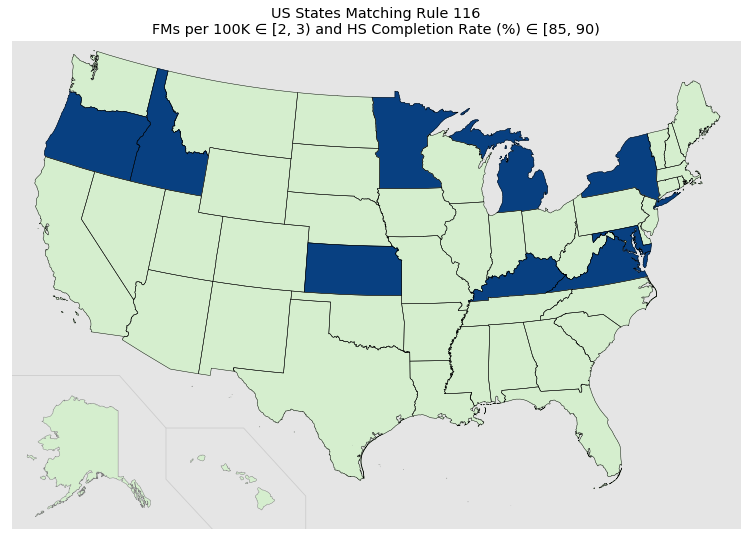

In [31]:
#generate map for rule_116
plt.rcParams['figure.figsize'] = (15,9)

fig, ax = plt.subplots()

# Lambert Conformal map of lower 48 states.
m = Basemap(llcrnrlon=-119,llcrnrlat=20,urcrnrlon=-64,urcrnrlat=49,
            projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

# Mercator projection, for Alaska and Hawaii
m_ = Basemap(llcrnrlon=-190,llcrnrlat=20,urcrnrlon=-143,urcrnrlat=46,
projection='merc',lat_ts=20) # do not change these numbers

#%% ---------   draw state boundaries  ------------------------------------
## data from U.S Census Bureau
## http://www.census.gov/geo/www/cob/st2000.html
shp_info = m.readshapefile('st99_d00','states',drawbounds=True,
                           linewidth=0.45,color='black')
shp_info_ = m_.readshapefile('st99_d00','states',drawbounds=False)

#%% ---------   convert rule set to dictionary  --------------------------
## only need single column for map generation
rule_116_d = rule_116.set_index('state')['fm_ml'].to_dict()

#%% -------- choose a color for matching states. -------
colors={}
statenames=[]
cmap = plt.cm.GnBu #use 'GnBu' colormap
vmin = 0; vmax = 450 # set range.
norm = Normalize(vmin=vmin, vmax=vmax)
for shapedict in m.states_info:
    statename = shapedict['NAME']
    if statename not in ['Puerto Rico']:
        if statename in rule_116_d:
            colors[statename] = cmap(vmax/4)
        else:
            colors[statename] = cmap(vmin + 50)
    statenames.append(statename)

#%% ---------  cycle through state names, color each one.  --------------------
for nshape,seg in enumerate(m.states):
    # skip Puerto Rico.
    if statenames[nshape] not in ['Puerto Rico']:
        color = rgb2hex(colors[statenames[nshape]])
        poly = Polygon(seg,facecolor=color,edgecolor=color)
        ax.add_patch(poly)

#%% ---------  Define offsets.  --------------------
AREA_1 = 0.005  # exclude small Hawaiian islands that are smaller than AREA_1
AREA_2 = AREA_1 * 30.0  # exclude Alaskan islands that are smaller than AREA_2
AK_SCALE = 0.19  # scale down Alaska to show as a map inset
HI_OFFSET_X = -1900000  # X coordinate offset amount to move Hawaii "beneath" Texas
HI_OFFSET_Y = 250000    # similar to above: Y offset for Hawaii
AK_OFFSET_X = -250000   # X offset for Alaska (These four values are obtained
AK_OFFSET_Y = -750000 # via manual trial and error, thus changing them is not recommended.)


for nshape, shapedict in enumerate(m_.states_info):  # plot Alaska and Hawaii as map insets
    if shapedict['NAME'] in ['Alaska', 'Hawaii']:
        seg = m_.states[int(shapedict['SHAPENUM'] - 1)]
        if shapedict['NAME'] == 'Hawaii' and float(shapedict['AREA']) > AREA_1:
            seg = [(x + HI_OFFSET_X, y + HI_OFFSET_Y) for x, y in seg]
            color = rgb2hex(colors[statenames[nshape]])
        elif shapedict['NAME'] == 'Alaska' and float(shapedict['AREA']) > AREA_2:
            seg = [(x*AK_SCALE + AK_OFFSET_X, y*AK_SCALE + AK_OFFSET_Y)\
                   for x, y in seg]
            color = rgb2hex(colors[statenames[nshape]])
        poly = Polygon(seg, facecolor=color, edgecolor='gray', linewidth=.45)
        ax.add_patch(poly)

main = 'US States Matching Rule 116'
sub = '\nFMs per 100K ∈ [2, 3) and HS Completion Rate (%) ∈ [85, 90)'
plt.title(main+sub)


#%% ---------  Plot bounding boxes for Alaska and Hawaii insets  --------------
light_gray = [0.8]*3  # define light gray color RGB
x1,y1 = m_([-190,-183,-180,-180,-175,-171,-171],[29,29,26,26,26,22,20])
x2,y2 = m_([-180,-180,-177],[26,23,20])  # these numbers are fine-tuned manually
m_.plot(x1,y1,color=light_gray,linewidth=0.8)  # do not change them drastically
m_.plot(x2,y2,color=light_gray,linewidth=0.8)

plt.show()

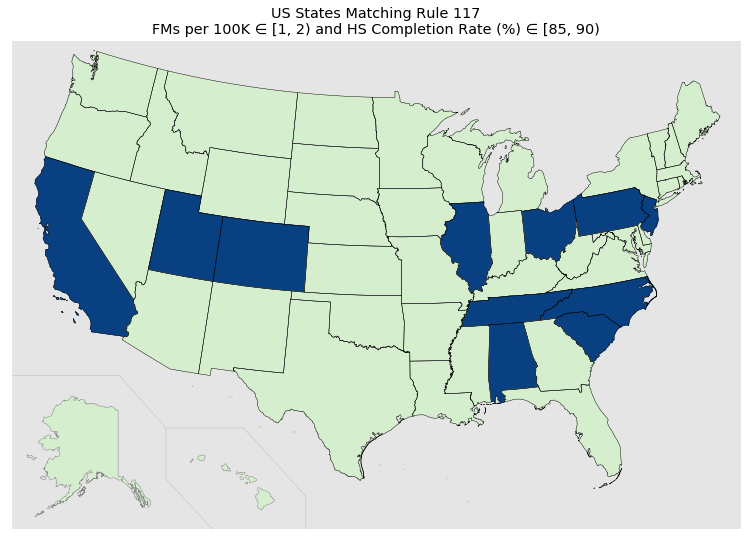

In [32]:
#generate map for rule_117
plt.rcParams['figure.figsize'] = (15,9)

fig, ax = plt.subplots()

# Lambert Conformal map of lower 48 states.
m = Basemap(llcrnrlon=-119,llcrnrlat=20,urcrnrlon=-64,urcrnrlat=49,
            projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

# Mercator projection, for Alaska and Hawaii
m_ = Basemap(llcrnrlon=-190,llcrnrlat=20,urcrnrlon=-143,urcrnrlat=46,
projection='merc',lat_ts=20) # do not change these numbers

#%% ---------   draw state boundaries  ------------------------------------
## data from U.S Census Bureau
## http://www.census.gov/geo/www/cob/st2000.html
shp_info = m.readshapefile('st99_d00','states',drawbounds=True,
                           linewidth=0.45,color='black')
shp_info_ = m_.readshapefile('st99_d00','states',drawbounds=False)

#%% ---------   convert rule set to dictionary  --------------------------
## only need single column for map generation
rule_117_d = rule_117.set_index('state')['fm_l'].to_dict()

#%% -------- choose a color for matching states. -------
colors={}
statenames=[]
cmap = plt.cm.GnBu #use 'GnBu' colormap
vmin = 0; vmax = 450 # set range.
norm = Normalize(vmin=vmin, vmax=vmax)
for shapedict in m.states_info:
    statename = shapedict['NAME']
    if statename not in ['Puerto Rico']:
        if statename in rule_117_d:
            colors[statename] = cmap(vmax/4)
        else:
            colors[statename] = cmap(vmin + 50)
    statenames.append(statename)

#%% ---------  cycle through state names, color each one.  --------------------
for nshape,seg in enumerate(m.states):
    # skip Puerto Rico.
    if statenames[nshape] not in ['Puerto Rico']:
        color = rgb2hex(colors[statenames[nshape]])
        poly = Polygon(seg,facecolor=color,edgecolor=color)
        ax.add_patch(poly)

#%% ---------  Define offsets.  --------------------
AREA_1 = 0.005  # exclude small Hawaiian islands that are smaller than AREA_1
AREA_2 = AREA_1 * 30.0  # exclude Alaskan islands that are smaller than AREA_2
AK_SCALE = 0.19  # scale down Alaska to show as a map inset
HI_OFFSET_X = -1900000  # X coordinate offset amount to move Hawaii "beneath" Texas
HI_OFFSET_Y = 250000    # similar to above: Y offset for Hawaii
AK_OFFSET_X = -250000   # X offset for Alaska (These four values are obtained
AK_OFFSET_Y = -750000 # via manual trial and error, thus changing them is not recommended.)


for nshape, shapedict in enumerate(m_.states_info):  # plot Alaska and Hawaii as map insets
    if shapedict['NAME'] in ['Alaska', 'Hawaii']:
        seg = m_.states[int(shapedict['SHAPENUM'] - 1)]
        if shapedict['NAME'] == 'Hawaii' and float(shapedict['AREA']) > AREA_1:
            seg = [(x + HI_OFFSET_X, y + HI_OFFSET_Y) for x, y in seg]
            color = rgb2hex(colors[statenames[nshape]])
        elif shapedict['NAME'] == 'Alaska' and float(shapedict['AREA']) > AREA_2:
            seg = [(x*AK_SCALE + AK_OFFSET_X, y*AK_SCALE + AK_OFFSET_Y)\
                   for x, y in seg]
            color = rgb2hex(colors[statenames[nshape]])
        poly = Polygon(seg, facecolor=color, edgecolor='gray', linewidth=.45)
        ax.add_patch(poly)

main = 'US States Matching Rule 117'
sub = '\nFMs per 100K ∈ [1, 2) and HS Completion Rate (%) ∈ [85, 90)'
plt.title(main+sub)


#%% ---------  Plot bounding boxes for Alaska and Hawaii insets  --------------
light_gray = [0.8]*3  # define light gray color RGB
x1,y1 = m_([-190,-183,-180,-180,-175,-171,-171],[29,29,26,26,26,22,20])
x2,y2 = m_([-180,-180,-177],[26,23,20])  # these numbers are fine-tuned manually
m_.plot(x1,y1,color=light_gray,linewidth=0.8)  # do not change them drastically
m_.plot(x2,y2,color=light_gray,linewidth=0.8)

plt.show()

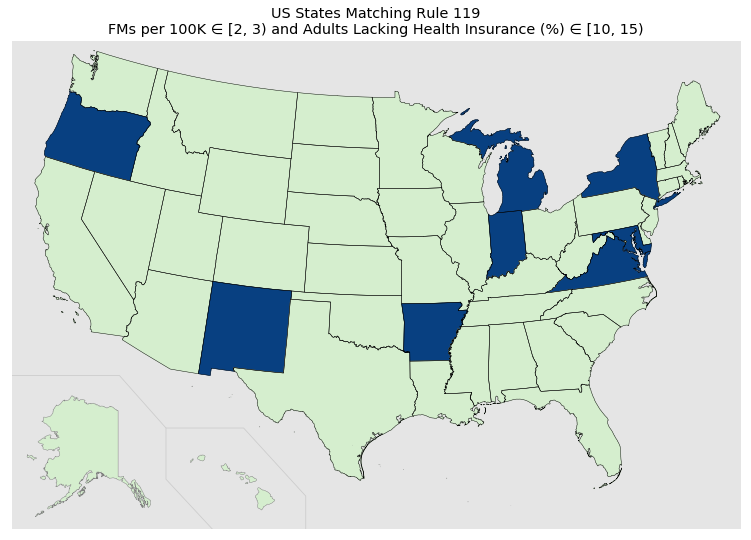

In [33]:
#generate map for rule_119
plt.rcParams['figure.figsize'] = (15,9)

fig, ax = plt.subplots()

# Lambert Conformal map of lower 48 states.
m = Basemap(llcrnrlon=-119,llcrnrlat=20,urcrnrlon=-64,urcrnrlat=49,
            projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

# Mercator projection, for Alaska and Hawaii
m_ = Basemap(llcrnrlon=-190,llcrnrlat=20,urcrnrlon=-143,urcrnrlat=46,
projection='merc',lat_ts=20) # do not change these numbers

#%% ---------   draw state boundaries  ------------------------------------
## data from U.S Census Bureau
## http://www.census.gov/geo/www/cob/st2000.html
shp_info = m.readshapefile('st99_d00','states',drawbounds=True,
                           linewidth=0.45,color='black')
shp_info_ = m_.readshapefile('st99_d00','states',drawbounds=False)

#%% ---------   convert rule set to dictionary  --------------------------
## only need single column for map generation
rule_119_d = rule_119.set_index('state')['fm_ml'].to_dict()

#%% -------- choose a color for matching states. -------
colors={}
statenames=[]
cmap = plt.cm.GnBu #use 'GnBu' colormap
vmin = 0; vmax = 450 # set range.
norm = Normalize(vmin=vmin, vmax=vmax)
for shapedict in m.states_info:
    statename = shapedict['NAME']
    if statename not in ['Puerto Rico']:
        if statename in rule_119_d:
            colors[statename] = cmap(vmax/4)
        else:
            colors[statename] = cmap(vmin + 50)
    statenames.append(statename)

#%% ---------  cycle through state names, color each one.  --------------------
for nshape,seg in enumerate(m.states):
    # skip Puerto Rico.
    if statenames[nshape] not in ['Puerto Rico']:
        color = rgb2hex(colors[statenames[nshape]])
        poly = Polygon(seg,facecolor=color,edgecolor=color)
        ax.add_patch(poly)

#%% ---------  Define offsets.  --------------------
AREA_1 = 0.005  # exclude small Hawaiian islands that are smaller than AREA_1
AREA_2 = AREA_1 * 30.0  # exclude Alaskan islands that are smaller than AREA_2
AK_SCALE = 0.19  # scale down Alaska to show as a map inset
HI_OFFSET_X = -1900000  # X coordinate offset amount to move Hawaii "beneath" Texas
HI_OFFSET_Y = 250000    # similar to above: Y offset for Hawaii
AK_OFFSET_X = -250000   # X offset for Alaska (These four values are obtained
AK_OFFSET_Y = -750000 # via manual trial and error, thus changing them is not recommended.)


for nshape, shapedict in enumerate(m_.states_info):  # plot Alaska and Hawaii as map insets
    if shapedict['NAME'] in ['Alaska', 'Hawaii']:
        seg = m_.states[int(shapedict['SHAPENUM'] - 1)]
        if shapedict['NAME'] == 'Hawaii' and float(shapedict['AREA']) > AREA_1:
            seg = [(x + HI_OFFSET_X, y + HI_OFFSET_Y) for x, y in seg]
            color = rgb2hex(colors[statenames[nshape]])
        elif shapedict['NAME'] == 'Alaska' and float(shapedict['AREA']) > AREA_2:
            seg = [(x*AK_SCALE + AK_OFFSET_X, y*AK_SCALE + AK_OFFSET_Y)\
                   for x, y in seg]
            color = rgb2hex(colors[statenames[nshape]])
        poly = Polygon(seg, facecolor=color, edgecolor='gray', linewidth=.45)
        ax.add_patch(poly)

main = 'US States Matching Rule 119'
sub = '\nFMs per 100K ∈ [2, 3) and Adults Lacking Health Insurance (%) ∈ [10, 15)'
plt.title(main+sub)


#%% ---------  Plot bounding boxes for Alaska and Hawaii insets  --------------
light_gray = [0.8]*3  # define light gray color RGB
x1,y1 = m_([-190,-183,-180,-180,-175,-171,-171],[29,29,26,26,26,22,20])
x2,y2 = m_([-180,-180,-177],[26,23,20])  # these numbers are fine-tuned manually
m_.plot(x1,y1,color=light_gray,linewidth=0.8)  # do not change them drastically
m_.plot(x2,y2,color=light_gray,linewidth=0.8)

plt.show()

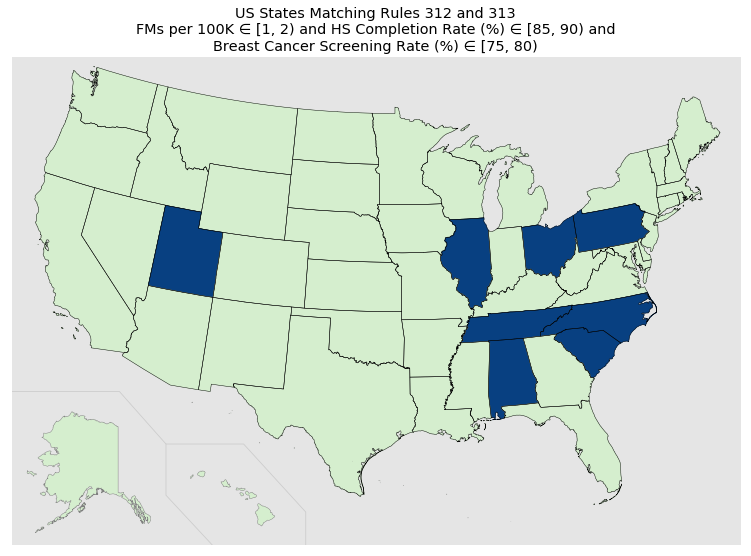

In [34]:
#generate map for rules 312 and 313 (same states matched)
plt.rcParams['figure.figsize'] = (15,9)

fig, ax = plt.subplots()

# Lambert Conformal map of lower 48 states.
m = Basemap(llcrnrlon=-119,llcrnrlat=20,urcrnrlon=-64,urcrnrlat=49,
            projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

# Mercator projection, for Alaska and Hawaii
m_ = Basemap(llcrnrlon=-190,llcrnrlat=20,urcrnrlon=-143,urcrnrlat=46,
projection='merc',lat_ts=20) # do not change these numbers

#%% ---------   draw state boundaries  ------------------------------------
## data from U.S Census Bureau
## http://www.census.gov/geo/www/cob/st2000.html
shp_info = m.readshapefile('st99_d00','states',drawbounds=True,
                           linewidth=0.45,color='black')
shp_info_ = m_.readshapefile('st99_d00','states',drawbounds=False)

#%% ---------   convert rule set to dictionary  --------------------------
## only need single column for map generation
## use of rule_312 is arbitrary
rule_312_d = rule_312.set_index('state')['fm_l'].to_dict()

#%% -------- choose a color for matching states. -------
colors={}
statenames=[]
cmap = plt.cm.GnBu #use 'GnBu' colormap
vmin = 0; vmax = 450 # set range.
norm = Normalize(vmin=vmin, vmax=vmax)
for shapedict in m.states_info:
    statename = shapedict['NAME']
    if statename not in ['Puerto Rico']:
        if statename in rule_312_d:
            colors[statename] = cmap(vmax/4)
        else:
            colors[statename] = cmap(vmin + 50)
    statenames.append(statename)

#%% ---------  cycle through state names, color each one.  --------------------
for nshape,seg in enumerate(m.states):
    # skip Puerto Rico.
    if statenames[nshape] not in ['Puerto Rico']:
        color = rgb2hex(colors[statenames[nshape]])
        poly = Polygon(seg,facecolor=color,edgecolor=color)
        ax.add_patch(poly)

#%% ---------  Define offsets.  --------------------
AREA_1 = 0.005  # exclude small Hawaiian islands that are smaller than AREA_1
AREA_2 = AREA_1 * 30.0  # exclude Alaskan islands that are smaller than AREA_2
AK_SCALE = 0.19  # scale down Alaska to show as a map inset
HI_OFFSET_X = -1900000  # X coordinate offset amount to move Hawaii "beneath" Texas
HI_OFFSET_Y = 250000    # similar to above: Y offset for Hawaii
AK_OFFSET_X = -250000   # X offset for Alaska (These four values are obtained
AK_OFFSET_Y = -750000 # via manual trial and error, thus changing them is not recommended.)


for nshape, shapedict in enumerate(m_.states_info):  # plot Alaska and Hawaii as map insets
    if shapedict['NAME'] in ['Alaska', 'Hawaii']:
        seg = m_.states[int(shapedict['SHAPENUM'] - 1)]
        if shapedict['NAME'] == 'Hawaii' and float(shapedict['AREA']) > AREA_1:
            seg = [(x + HI_OFFSET_X, y + HI_OFFSET_Y) for x, y in seg]
            color = rgb2hex(colors[statenames[nshape]])
        elif shapedict['NAME'] == 'Alaska' and float(shapedict['AREA']) > AREA_2:
            seg = [(x*AK_SCALE + AK_OFFSET_X, y*AK_SCALE + AK_OFFSET_Y)\
                   for x, y in seg]
            color = rgb2hex(colors[statenames[nshape]])
        poly = Polygon(seg, facecolor=color, edgecolor='gray', linewidth=.45)
        ax.add_patch(poly)

main = 'US States Matching Rules 312 and 313'
sub1 = '\nFMs per 100K ∈ [1, 2) and HS Completion Rate (%) ∈ [85, 90) and'
sub2 = '\nBreast Cancer Screening Rate (%) ∈ [75, 80)'
plt.title(main+sub1+sub2)


#%% ---------  Plot bounding boxes for Alaska and Hawaii insets  --------------
light_gray = [0.8]*3  # define light gray color RGB
x1,y1 = m_([-190,-183,-180,-180,-175,-171,-171],[29,29,26,26,26,22,20])
x2,y2 = m_([-180,-180,-177],[26,23,20])  # these numbers are fine-tuned manually
m_.plot(x1,y1,color=light_gray,linewidth=0.8)  # do not change them drastically
m_.plot(x2,y2,color=light_gray,linewidth=0.8)

plt.show()

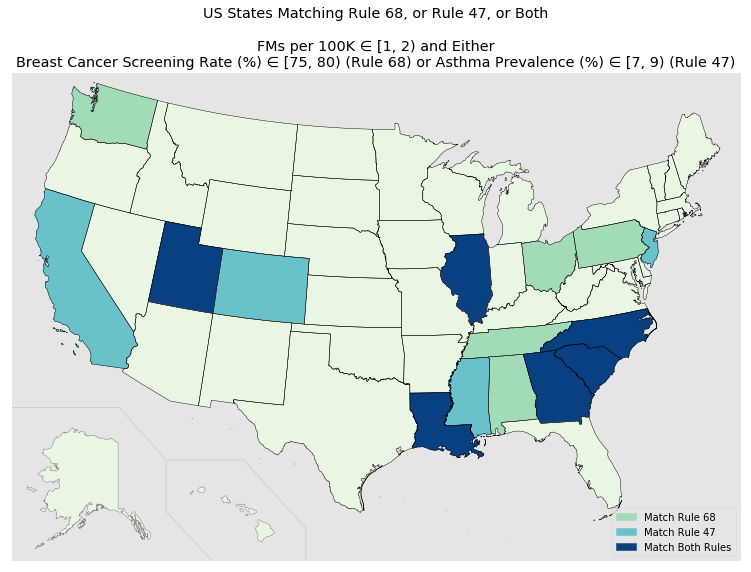

In [47]:
#generate map for rules 68 and 47, showing overlap states
import matplotlib.patches as mpatches

plt.rcParams['figure.figsize'] = (15,9)

fig, ax = plt.subplots()

# Lambert Conformal map of lower 48 states.
m = Basemap(llcrnrlon=-119,llcrnrlat=20,urcrnrlon=-64,urcrnrlat=49,
            projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

# Mercator projection, for Alaska and Hawaii
m_ = Basemap(llcrnrlon=-190,llcrnrlat=20,urcrnrlon=-143,urcrnrlat=46,
projection='merc',lat_ts=20) # do not change these numbers

#%% ---------   draw state boundaries  ------------------------------------
## data from U.S Census Bureau
## http://www.census.gov/geo/www/cob/st2000.html
shp_info = m.readshapefile('st99_d00','states',drawbounds=True,
                           linewidth=0.45,color='black')
shp_info_ = m_.readshapefile('st99_d00','states',drawbounds=False)


#%% -------- choose a color for matching states. -------
colors={}
statenames=[]
cmap = plt.cm.GnBu #use 'GnBu' colormap
vmin = 0; vmax = 450 # set range.
norm = Normalize(vmin=vmin, vmax=vmax)
for shapedict in m.states_info:
    statename = shapedict['NAME']
    if statename not in ['Puerto Rico']:
        if statename in rule_68_d:
            if statename not in rule_47_d:
                colors[statename] = cmap(vmin + 100) #only matches rule 68
            else:
                colors[statename] = cmap(vmax/4) #matches both
        elif statename in rule_47_d:
            if statename not in rule_68_d:
                colors[statename] = cmap(vmin + 140) #only matches rule 47
            else:
                colors[statename] = cmap(vmax/4) #matches both
        else:
            colors[statename] = cmap(vmin + 20) #no match
    statenames.append(statename)

#%% ---------  cycle through state names, color each one.  --------------------
for nshape,seg in enumerate(m.states):
    # skip Puerto Rico.
    if statenames[nshape] not in ['Puerto Rico']:
        color = rgb2hex(colors[statenames[nshape]])
        poly = Polygon(seg,facecolor=color,edgecolor=color)
        ax.add_patch(poly)

#%% ---------  Define offsets.  --------------------
AREA_1 = 0.005  # exclude small Hawaiian islands that are smaller than AREA_1
AREA_2 = AREA_1 * 30.0  # exclude Alaskan islands that are smaller than AREA_2
AK_SCALE = 0.19  # scale down Alaska to show as a map inset
HI_OFFSET_X = -1900000  # X coordinate offset amount to move Hawaii "beneath" Texas
HI_OFFSET_Y = 250000    # similar to above: Y offset for Hawaii
AK_OFFSET_X = -250000   # X offset for Alaska (These four values are obtained
AK_OFFSET_Y = -750000 # via manual trial and error, thus changing them is not recommended.)


for nshape, shapedict in enumerate(m_.states_info):  # plot Alaska and Hawaii as map insets
    if shapedict['NAME'] in ['Alaska', 'Hawaii']:
        seg = m_.states[int(shapedict['SHAPENUM'] - 1)]
        if shapedict['NAME'] == 'Hawaii' and float(shapedict['AREA']) > AREA_1:
            seg = [(x + HI_OFFSET_X, y + HI_OFFSET_Y) for x, y in seg]
            color = rgb2hex(colors[statenames[nshape]])
        elif shapedict['NAME'] == 'Alaska' and float(shapedict['AREA']) > AREA_2:
            seg = [(x*AK_SCALE + AK_OFFSET_X, y*AK_SCALE + AK_OFFSET_Y)\
                   for x, y in seg]
            color = rgb2hex(colors[statenames[nshape]])
        poly = Polygon(seg, facecolor=color, edgecolor='gray', linewidth=.45)
        ax.add_patch(poly)

#%% ---------  Define title  --------------
main = 'US States Matching Rule 68, or Rule 47, or Both\n'
sub1 = '\nFMs per 100K ∈ [1, 2) and Either'
sub2 = '\nBreast Cancer Screening Rate (%) ∈ [75, 80) (Rule 68) or Asthma Prevalence (%) ∈ [7, 9) (Rule 47)'
plt.title(main+sub1+sub2)

#%% ---------  Define legend  --------------
r_68_color = rgb2hex(cmap(vmin + 100))
r_47_color = rgb2hex(cmap(vmin + 140))
r_both_color = rgb2hex(cmap(vmax/4))
r_68_patch = mpatches.Patch(color=r_68_color, label='Match Rule 68')
r_47_patch = mpatches.Patch(color=r_47_color, label='Match Rule 47')
r_both_patch = mpatches.Patch(color=r_both_color, label='Match Both Rules')
plt.legend(handles=[r_68_patch, r_47_patch, r_both_patch], loc=4)


#%% ---------  Plot bounding boxes for Alaska and Hawaii insets  --------------
light_gray = [0.8]*3  # define light gray color RGB
x1,y1 = m_([-190,-183,-180,-180,-175,-171,-171],[29,29,26,26,26,22,20])
x2,y2 = m_([-180,-180,-177],[26,23,20])  # these numbers are fine-tuned manually
m_.plot(x1,y1,color=light_gray,linewidth=0.8)  # do not change them drastically
m_.plot(x2,y2,color=light_gray,linewidth=0.8)

plt.show()